In [77]:
import numpy as np
import matplotlib.pyplot as plt

### 随机生成200个x点，范围在 [0, 2π]

In [78]:
x = np.random.uniform(0, 2 * np.pi, 200)
y_true = np.sin(x)
x_normalized = (x - x.min()) / (x.max() - x.min())

### 初始化

In [79]:
a = np.random.randn(6)

In [80]:
learning_rate = 0.1
iterations = 1000000

In [81]:
def polynomial(x, a):
    return a[0] + a[1] * x + a[2] * x**2 + a[3] * x**3 + a[4] * x**4 + a[5] * x**5

### loss function

In [82]:
def loss_func(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

### 梯度下降

In [83]:
for i in range(iterations):
    y_pred = polynomial(x_normalized, a)
    error = y_pred - y_true
    
    #梯度计算
    gradients = [
        np.mean(error),  
        np.mean(error * x_normalized),  
        np.mean(error * x_normalized**2),  
        np.mean(error * x_normalized**3),  
        np.mean(error * x_normalized**4),  
        np.mean(error * x_normalized**5)   
    ]
    
    ##参数更新
    for j in range(6):
        a[j] -= learning_rate * gradients[j]
    
    
    if i % 5000 == 0:
        loss = loss_func(y_pred, y_true)
        print(f"Iteration {i}: Loss = {loss}")

Iteration 0: Loss = 0.6200630690673427
Iteration 5000: Loss = 0.11120187167284883
Iteration 10000: Loss = 0.0665633664194454
Iteration 15000: Loss = 0.044207921341399815
Iteration 20000: Loss = 0.032940126578420506
Iteration 25000: Loss = 0.027190481169714672
Iteration 30000: Loss = 0.024188247549235414
Iteration 35000: Loss = 0.02255501063886545
Iteration 40000: Loss = 0.021605005079177685
Iteration 45000: Loss = 0.020997043733727187
Iteration 50000: Loss = 0.0205613599295775
Iteration 55000: Loss = 0.020213465352916852
Iteration 60000: Loss = 0.019911296278715036
Iteration 65000: Loss = 0.019633894774374834
Iteration 70000: Loss = 0.01937080306936668
Iteration 75000: Loss = 0.019116787484432574
Iteration 80000: Loss = 0.018869213697089826
Iteration 85000: Loss = 0.018626740987512755
Iteration 90000: Loss = 0.01838867264764664
Iteration 95000: Loss = 0.01815463281690985
Iteration 100000: Loss = 0.017924405707907102
Iteration 105000: Loss = 0.017697855617640704
Iteration 110000: Loss =

### 参数更新

### 绘图

In [84]:
#生成点拟合训练图像
x_test = np.linspace(0, 2 * np.pi, 100)
x_test_normalized = (x_test - x_test.min()) / (x_test.max() - x_test.min())
y_test_true = np.sin(x_test)

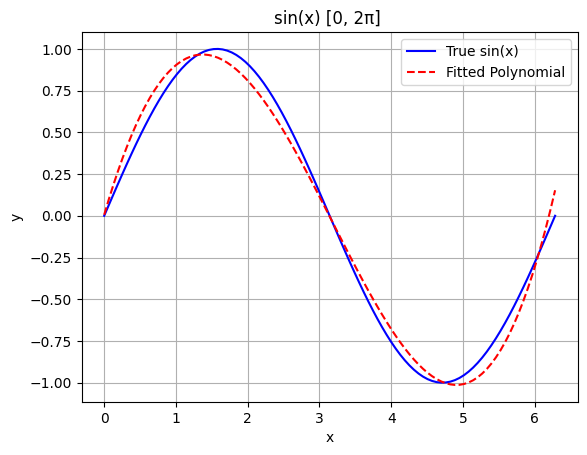

Final parameters: [ 5.95774531e-03  9.30316244e+00 -2.41605473e+01  4.76910286e+00
  1.47955963e+01 -4.56033079e+00]


In [85]:
plt.plot(x_test, y_test_true, label='True sin(x)', color='blue')
plt.plot(x_test, polynomial(x_test_normalized, a), label='Fitted Polynomial', color='red', linestyle='--')
plt.legend()
plt.title("sin(x) [0, 2π] ")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

#输出最终的参数值
print("Final parameters:", a)